# Dee Perillo
# SI370 Final Winter 2017
# UFO Analysis

## UFO data from NUFORC, .csv File from https://github.com/planetsig/ufo-reports

### Key Questions:
1.	Are there trends of UFO reports over time? Do seasonal trends exist?
2.	Are UFO summaries mostly positive, negative, or neutral in language? Or, are reports tinged with fear, curiosity, excitement?
3.	Are certain UFO shapes more prevalent in reports than others? 
4.	Are certain locations more akin to UFO reports?


In [245]:
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import HTML, display
from PIL import Image
from datetime import datetime
from dateutil.parser import parse
import scipy as sp
import scipy.spatial.distance as spd
import scipy.cluster.hierarchy as sph
import sklearn as sk
import sklearn.ensemble as skens
import sklearn.naive_bayes as sknb
import sklearn.tree as sktree
import sklearn.metrics as skm
import sklearn.cluster as skc
import sklearn.decomposition as skd
import sklearn.mixture as skmix
import sklearn.mixture as skmix
import sklearn.manifold as manifold
import sklearn.cross_validation as skcv
import sklearn.decomposition as skd
import sklearn.feature_extraction.text as skft
import sklearn.pipeline as skpipe
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', color_codes=True, font_scale=1.3)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import re
import os.path
import nltk
import math
from nltk.corpus import stopwords
import collections
import os


%matplotlib inline

# make the Pandas tables a little more readable
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [246]:
# Filter all warnings.
import warnings
warnings.filterwarnings('ignore')

In [247]:
ufo_og = pd.read_csv('ufo-scrubbed-geocoded-time-standardized.csv')
ufo_og = ufo_og.drop('date posted', axis=1)
# ufo_og.index = ufo_og.date
# ufo_og.index = ufo_og.index.to_datetime()
# ufo_og['duration in seconds'] = ufo_og.myst
# ufo_og = ufo_og.drop('myst',axis=1)

ufo_og = ufo_og.dropna()
ufo_og = ufo_og[ufo_og.date.str.contains('/')] # gets rid of some bad random dates

ufo_og.date = pd.to_datetime(ufo_og.date)

In [248]:
ufo_og.summary = ufo_og.summary.str.replace(r'&#44', ',') # replace HTML code for comma with actual comma
ufo_og.summary = ufo_og.summary.str.replace(r'&#33', '!') # replace HTML code for ! with actual !
ufo_og.summary = ufo_og.summary.str.replace(r'&#39', '\'') # replace HTML code for ' with actual '
ufo_og.summary = ufo_og.summary.str.replace(r'&amp;', '&')
ufo_og.index = ufo_og.date

In [249]:
ufo_og.head()

,date,city,state,country,shape,duration in seconds,time,summary,lat,long
date,,,,,,,,,,
1949-10-10 20:30:00,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,29.8830556,-97.941111
1956-10-10 21:00:00,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,28.9783333,-96.645833
1960-10-10 20:00:00,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.4180556,-157.803611
1961-10-10 19:00:00,1961-10-10 19:00:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,36.595,-82.188889
1965-10-10 23:45:00,1965-10-10 23:45:00,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,41.1175,-73.408333


In [250]:
ufo_us = ufo_og[ufo_og.country == 'us'] # create dataframe for only us reports

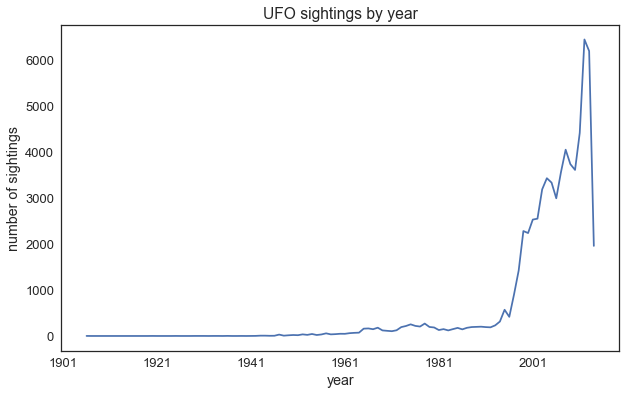

In [469]:
ufo_year = ufo_og.resample('AS').count()
plt.figure(figsize=(10,6))
plt.title('UFO sightings by year')
plt.xlabel('year')
plt.ylabel('number of sightings')
plt.plot(ufo_year['state'])

### UFO reports peaked in 2012. Data was parsed in mid-2014.

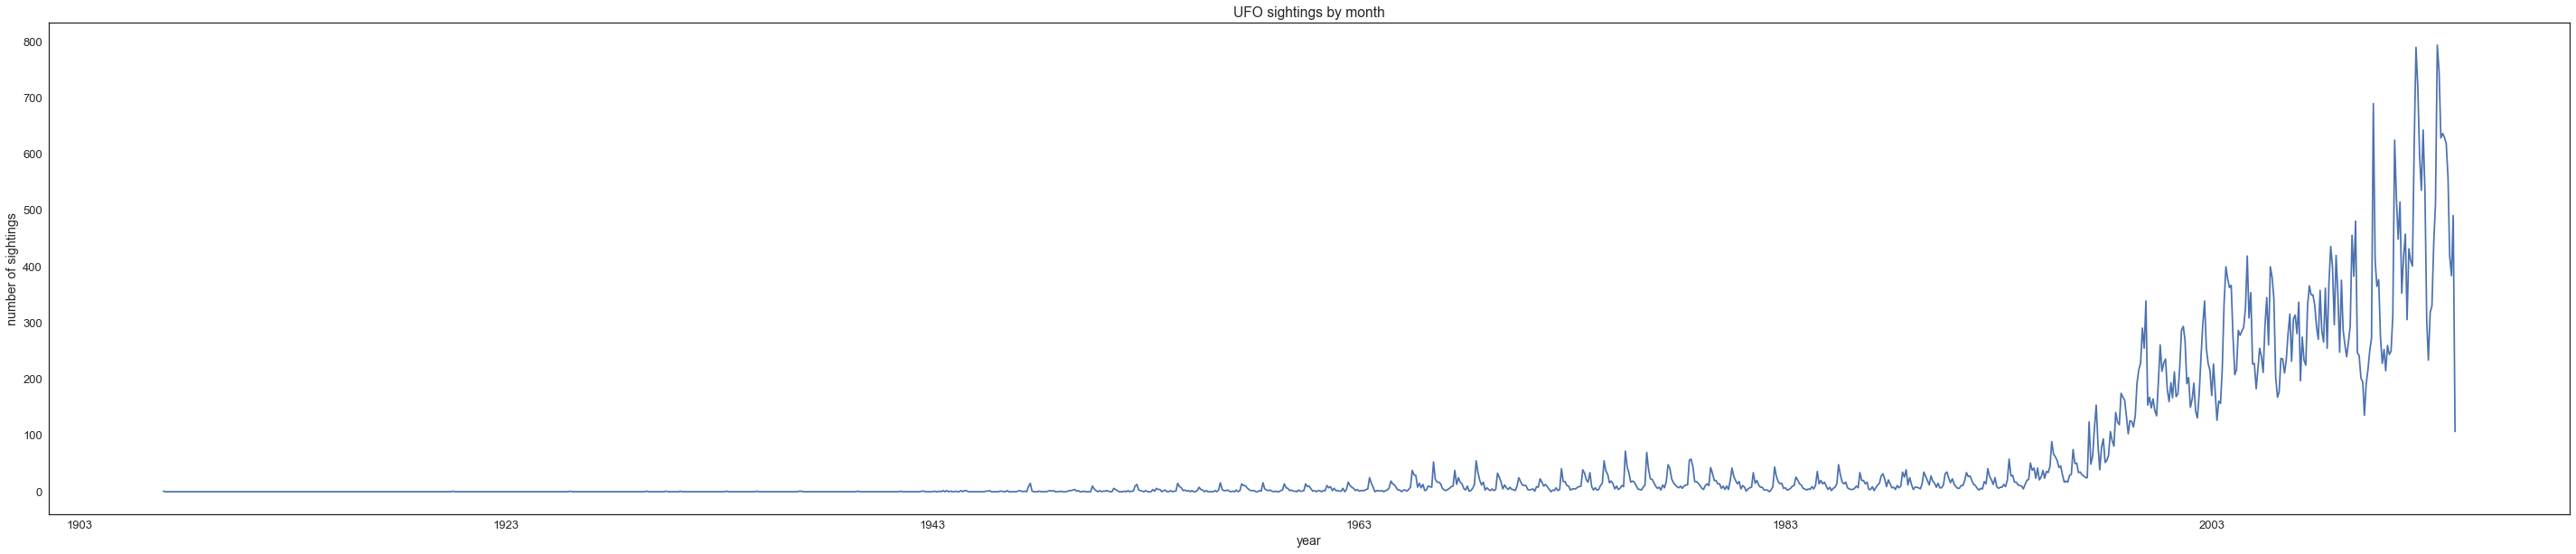

In [252]:
ufo_month = ufo_og.resample('M').count()
plt.figure(figsize=(50,10))
plt.title('UFO sightings by month')
plt.xlabel('year')
plt.ylabel('number of sightings')
plt.plot(ufo_month['state'])

### Obviously more recent data is more interesting, up until around 1950 UFO reports are pretty rare

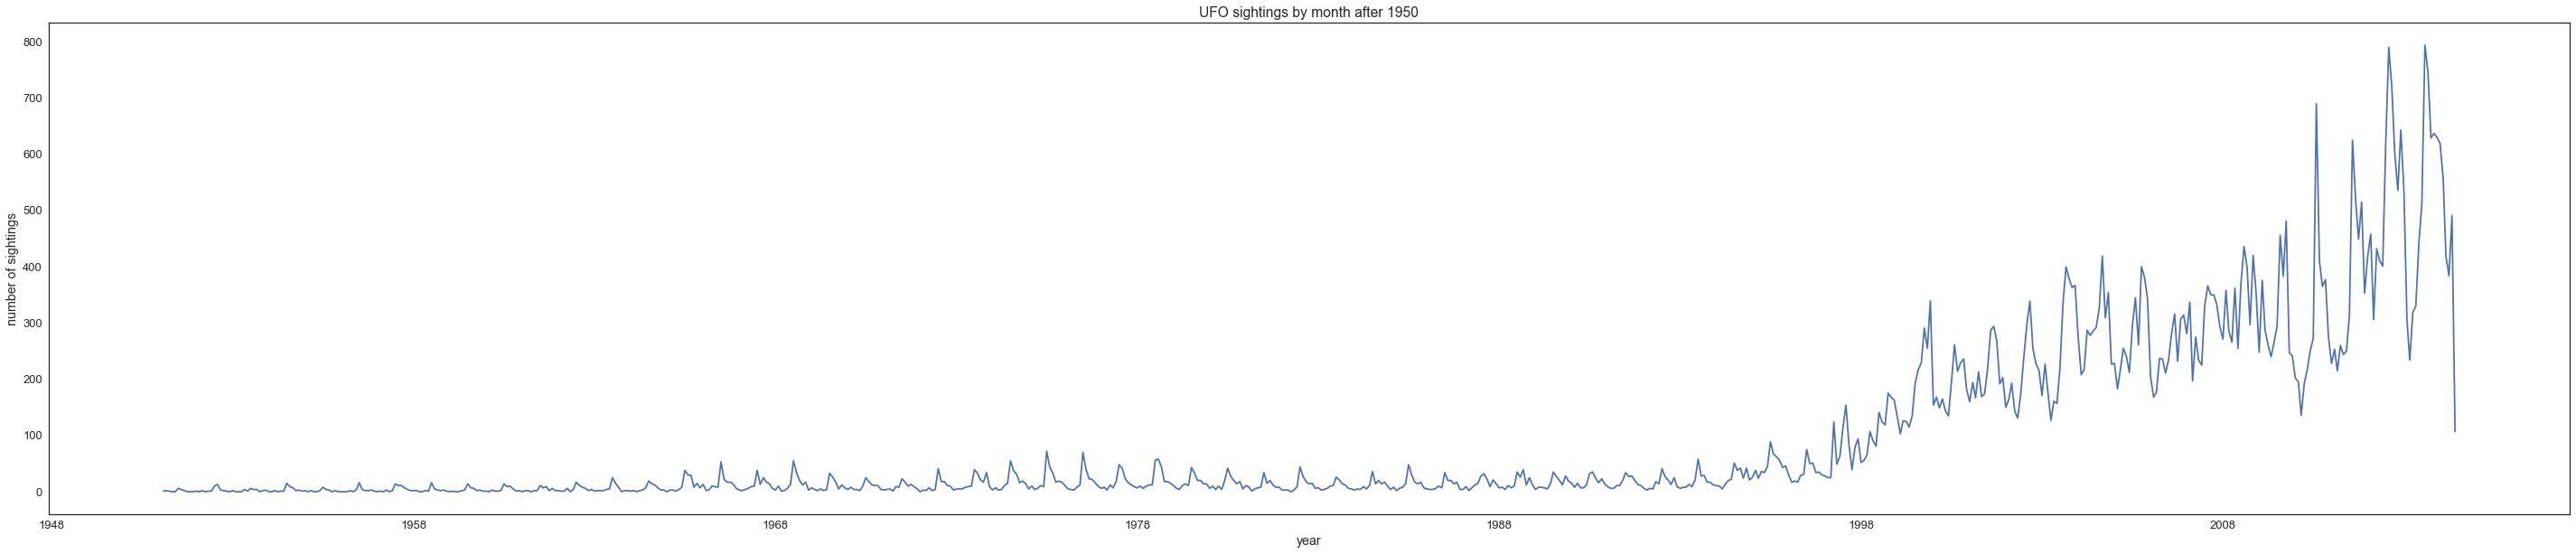

In [253]:
ufo_post1950 = ufo_month.copy()
ufo_post1950 = ufo_post1950[ufo_post1950.index.year > 1950]
plt.figure(figsize=(50,10))
plt.title('UFO sightings by month after 1950')
plt.xlabel('year')
plt.ylabel('number of sightings')
plt.plot(ufo_post1950['state'])

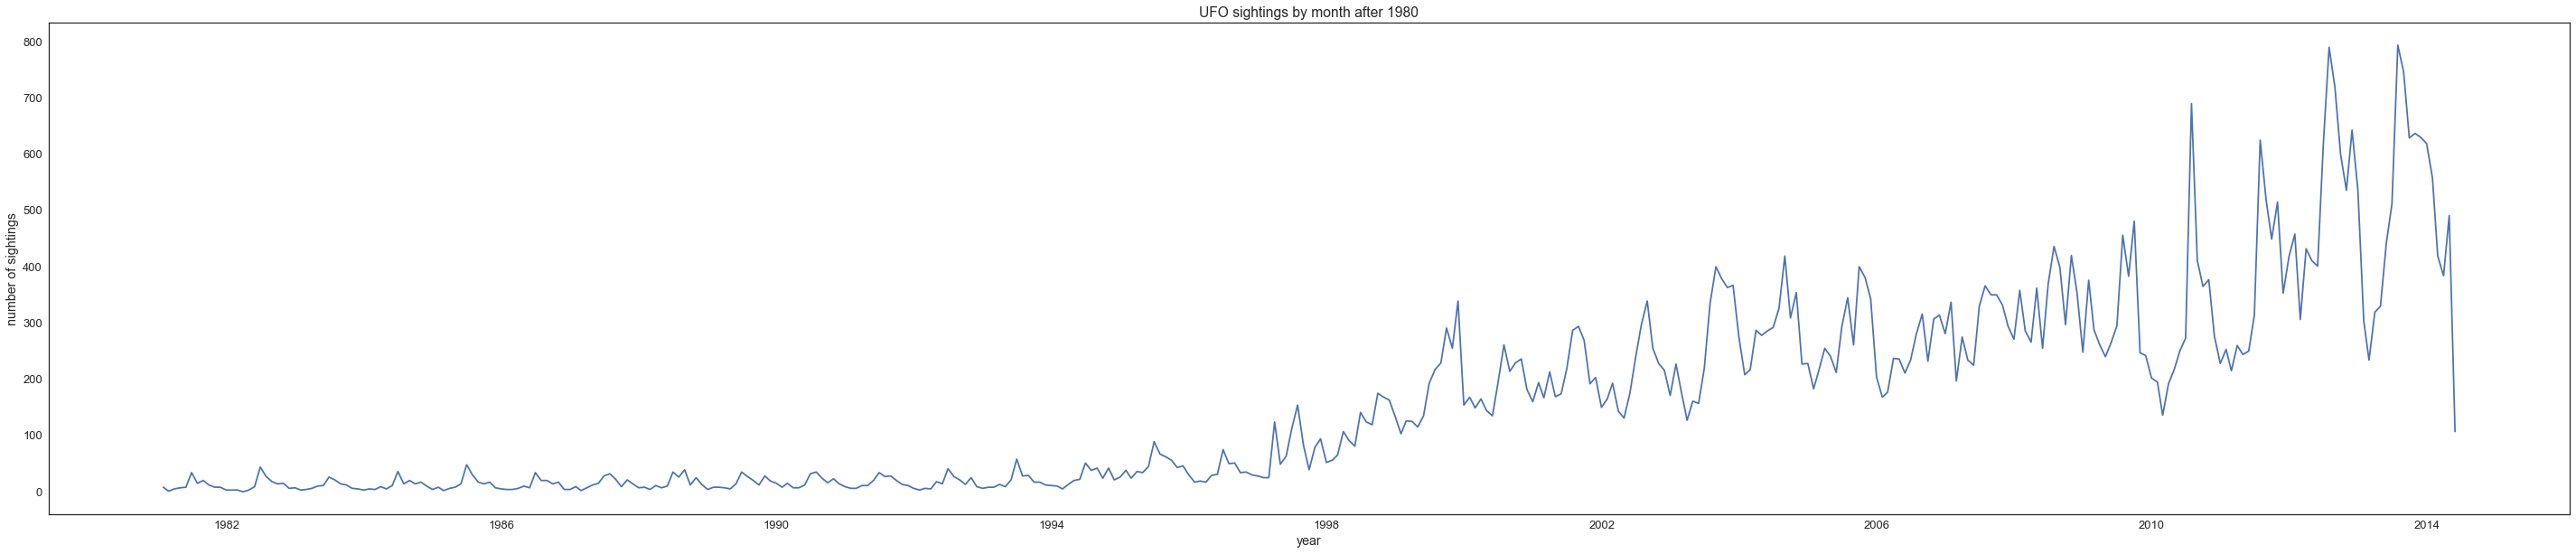

In [254]:
ufo_post1980 = ufo_month.copy()
ufo_post1980 = ufo_post1980[ufo_post1980.index.year > 1980]
plt.figure(figsize=(50,10))
plt.title('UFO sightings by month after 1980')
plt.xlabel('year')
plt.ylabel('number of sightings')
plt.plot(ufo_post1980['state'])

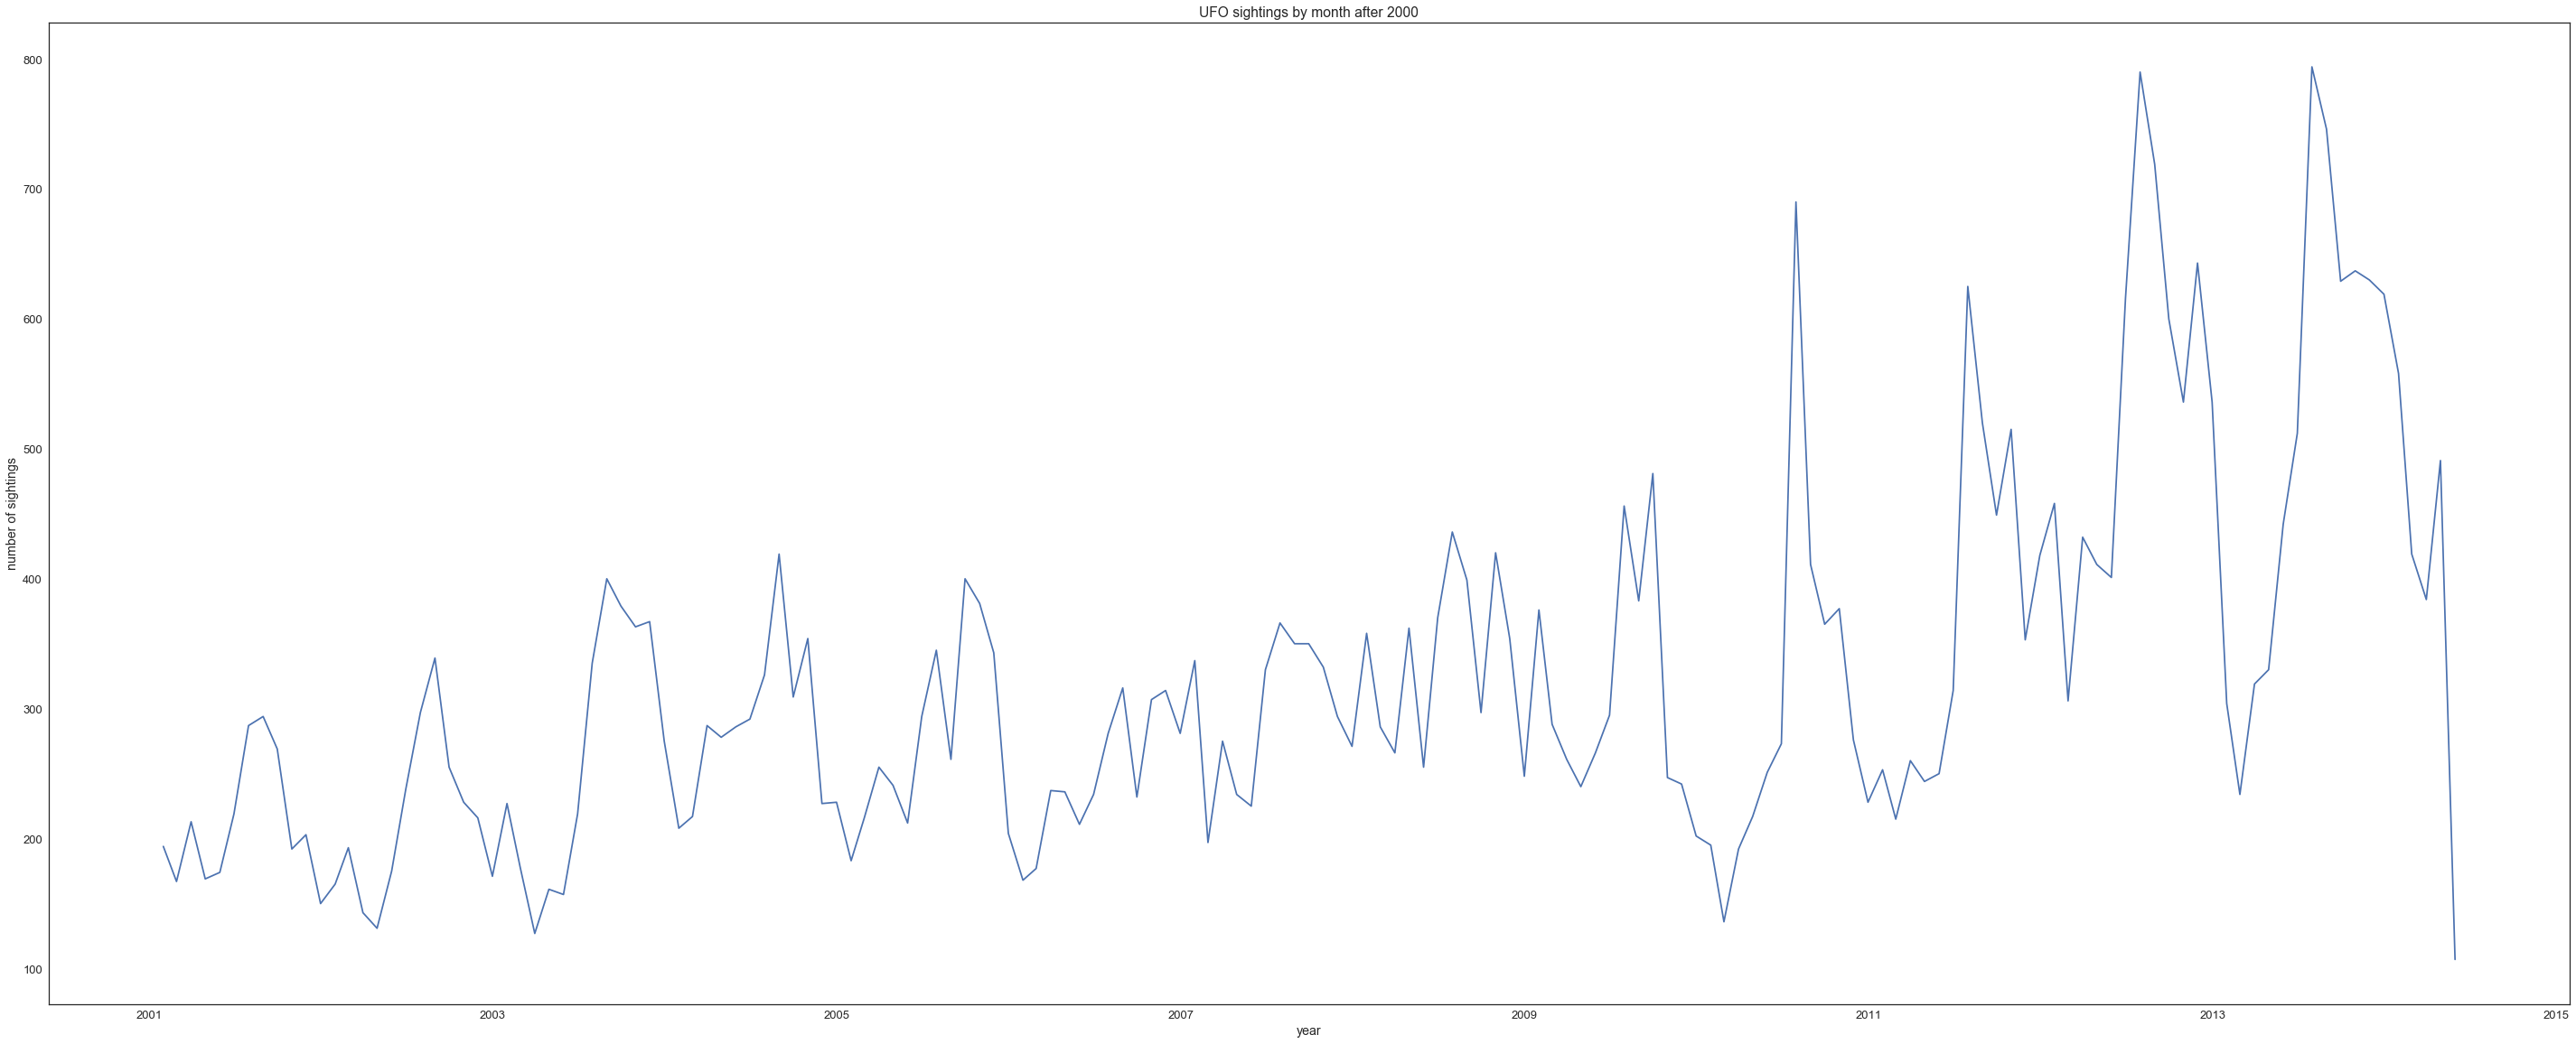

In [255]:
ufo_post2000 = ufo_month.copy()
ufo_post2000 = ufo_post2000[ufo_post2000.index.year > 2000]
plt.figure(figsize=(50,20))
plt.title('UFO sightings by month after 2000')
plt.xlabel('year')
plt.ylabel('number of sightings')
plt.plot(ufo_post2000['state'])

### Reports after 2000 appear to have some seasonality.

In [256]:
ufo_group = ufo_us.groupby(['state','shape']).count()

In [257]:
ufo_group = ufo_group.unstack('state')['city']
ufo_group = ufo_group.fillna(0)

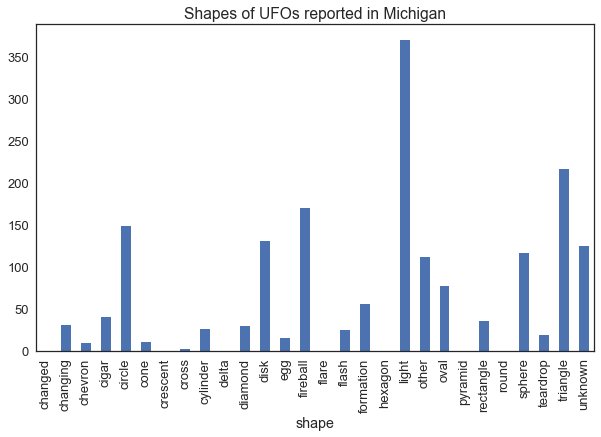

In [258]:
ufo_group.mi.plot(kind='bar',title='Shapes of UFOs reported in Michigan',figsize=(10,6))

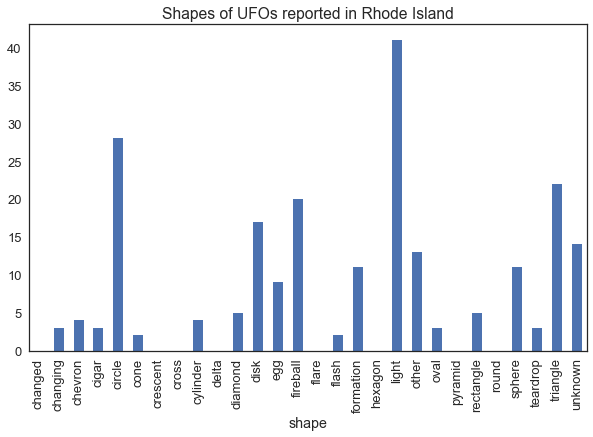

In [259]:
ufo_group.ri.plot(kind='bar',title='Shapes of UFOs reported in Rhode Island',figsize=(10,6))

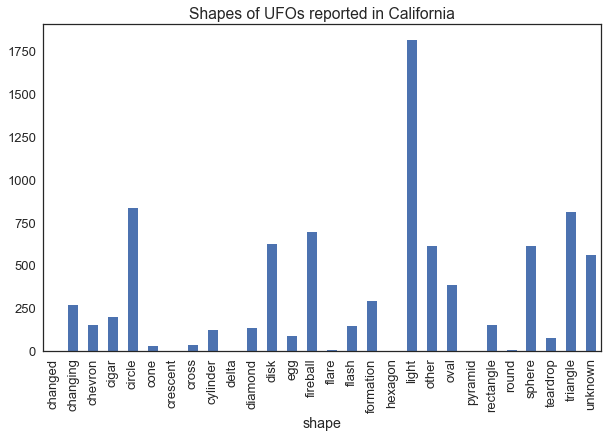

In [260]:
ufo_group.ca.plot(kind='bar',title='Shapes of UFOs reported in California',figsize=(10,6))

In [261]:
shape_totals = []
state_totals = []

for ufo_shape in ufo_group.index:
    shape_totals.append(ufo_group.ix[ufo_shape].sum())
ufo_group['shape totals'] = shape_totals

for state in ufo_group.columns:
    state_totals.append(ufo_group[state].sum())

ufo_group.ix['state totals'] = state_totals

In [262]:
ufo_group.ix['state totals'].sort_values(ascending=False).head(6)

state
shape totals    63037.0
ca               8610.0
fl               3729.0
wa               3676.0
tx               3370.0
ny               2900.0
Name: state totals, dtype: float64

### The states with the most UFO reports are California, Florida, Washington, Texas, and New York.

In [263]:
ufo_group['shape totals'].drop('unknown',axis=0).drop('other',axis=0).sort_values(ascending=False).head(6)

shape
state totals    63037.0
light           13362.0
triangle         6476.0
circle           6061.0
fireball         5111.0
sphere           4320.0
Name: shape totals, dtype: float64

### The most reported shapes (ignoring unknown and other) are light, triangle, circle, fireball, and sphere. 

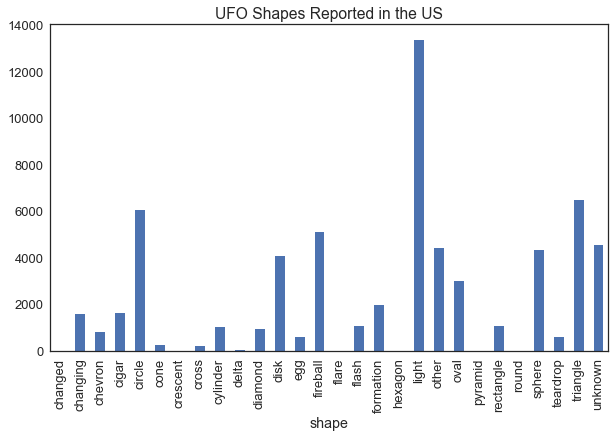

In [264]:
ufo_group['shape totals'].drop('state totals',axis=0).plot(kind='bar',title='UFO Shapes Reported in the US',figsize=(10,6))

![UFO Shapes Reported](shape count.png)
![UFO Shapes Reported By State](state by shape.png)

### Light is the most reported shape in most states.

In [265]:
shapeslist = []

for state in ufo_group.columns:
    shapeslist.append(ufo_group.drop('state totals',axis=0)[state].idxmax())

In [266]:
ufo_group.ix['most']= shapeslist

In [267]:
ufo_og['duration in seconds'] = ufo_og['duration in seconds'].astype(float)

In [268]:
ufo_og.head()

,date,city,state,country,shape,duration in seconds,time,summary,lat,long
date,,,,,,,,,,
1949-10-10 20:30:00,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,29.8830556,-97.941111
1956-10-10 21:00:00,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,28.9783333,-96.645833
1960-10-10 20:00:00,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.4180556,-157.803611
1961-10-10 19:00:00,1961-10-10 19:00:00,bristol,tn,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,36.595,-82.188889
1965-10-10 23:45:00,1965-10-10 23:45:00,norwalk,ct,us,disk,1200.0,20 minutes,A bright orange color changing to reddish colo...,41.1175,-73.408333


In [269]:
ufo_date = ufo_og.copy()
ufo_date = ufo_date.to_period('D')
ufo_date.date = ufo_date.index
### RESAMPLE date to just do year/month/day and not time.

In [270]:
counted = ufo_date.groupby(['state','city','date']).count()
top = counted[counted.country > 7]
top.sort_values('country',ascending=False)

country  shape  duration in seconds  time  \
state city        date                                                    
il    tinley park 2004-10-31       54     54                   54    54   
                  2004-08-21       26     26                   26    26   
az    phoenix     1997-03-13       20     20                   20    20   
il    rockford    2001-01-11       16     16                   16    16   
      tinley park 2005-09-30       12     12                   12    12   
az    phoenix     2008-04-21        8      8                    8     8   
il    oak forest  2005-10-01        8      8                    8     8   
      orland park 2005-09-30        8      8                    8     8   
      rockford    2000-02-16        8      8                    8     8   
oh    columbus    2013-07-06        8      8                    8     8   

                              summary  lat  long  
state city        date                            
il    tinley park 2004-10-31       54   54    54  
                  2004-08-21       26   26    26  
az    phoenix     1997-03-13       20   20    20  
il    rockford    2001-01-11       16   16    16  
      tinley park 2005-09-30       12   12    12  
az    phoenix     2008-04-21        8    8     8  
il    oak forest  2005-10-01        8    8     8  
      orland park 2005-09-30        8    8     8  
      rockford    2000-02-16        8    8     8  
oh    columbus    2013-07-06        8    8     8

### The most reported UFO sightings from a single location happened:
    Tinley Park, IL October 31, 2004 - 54 reports, and August 21, 2004 - 26 reports 
    Phoenix, AZ March 13, 1997 - 20 reports
    Rockford, IL January 11, 2001 - 16 reports
    Tinley Park, IL September 20, 2005 - 12 reports.
    Phoenix, AZ April 21, 2008 - 8 reports
    Oak Forest, IL October 1, 2005 - 8 reports
    Orland Park, IL September 30, 2005 - 8 reports 
    Rockford IL, February 16, 2000 - 8 reports
    Columbus, OH July 7, 2013 - 8 reports

![Most Reported UFO Sightings](how many map.png)

In [271]:
ufo_days = ufo_og.copy()
ufo_days = ufo_days.drop(['time','summary'], axis=1)

In [272]:
#ufo_days['day of the year'] = datetime.strftime(ufo_days['day of the year'], '%j')
daylist = []
for row in ufo_days.index:
    daylist.append(datetime.strftime(row,'%j'))
    
ufo_days['day of the year'] = daylist
ufo_days.sample(10)

,date,city,state,country,shape,duration in seconds,lat,long,day of the year
date,,,,,,,,,
2006-08-15 20:30:00,2006-08-15 20:30:00,cleveland,oh,us,diamond,600.0,41.4994,-81.695556,227
2002-09-10 11:15:00,2002-09-10 11:15:00,sedona,az,us,sphere,600.0,34.8697,-111.760278,253
2001-05-26 01:15:00,2001-05-26 01:15:00,bates city,mo,us,light,2.0,39.0061111,-94.072222,146
2011-07-03 22:50:00,2011-07-03 22:50:00,waverly,ne,us,light,240.0,40.9175,-96.528056,184
1979-09-01 20:00:00,1979-09-01 20:00:00,commack,ny,us,other,900.0,40.8428,-73.293333,244
2009-10-27 01:04:00,2009-10-27 01:04:00,abilene,tx,us,light,120.0,32.4486111,-99.732778,300
2013-11-18 19:00:00,2013-11-18 19:00:00,antioch,tn,us,sphere,7200.0,36.06,-86.672222,322
2012-05-08 21:15:00,2012-05-08 21:15:00,alameda,ca,us,fireball,600.0,37.7652778,-122.240556,129
2009-07-04 21:45:00,2009-07-04 21:45:00,goodyear,az,us,unknown,120.0,33.4352778,-112.357500,185


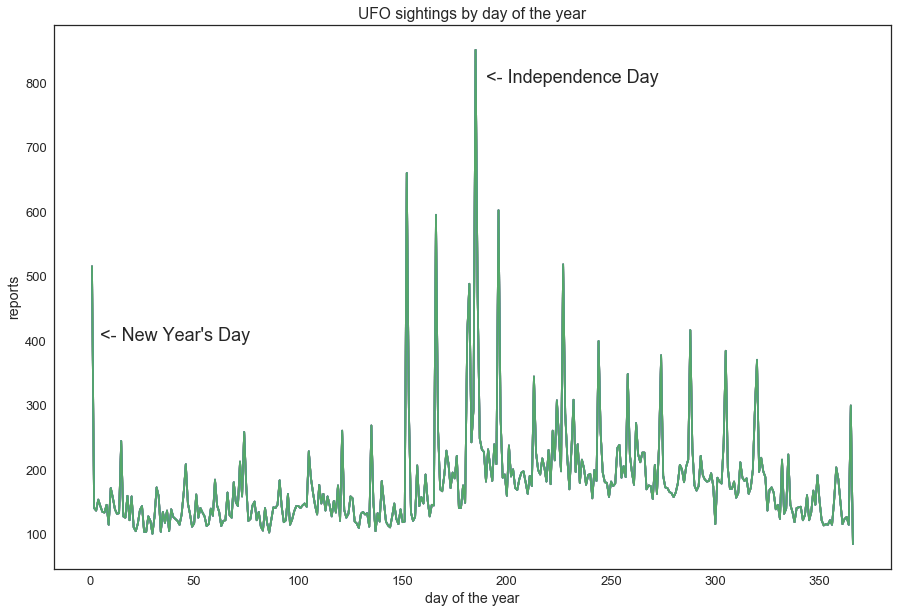

In [475]:
days = ufo_days.groupby('day of the year').count()
days.index
days.index.shape

plt.figure(figsize=(15,10))
plt.title('UFO sightings by day of the year')
plt.xlabel('day of the year')
plt.ylabel('reports')
plt.plot(days.index, ufo_days.groupby('day of the year').count())

plt.text(5, 400,'<- New Year\'s Day')

plt.text(190, 800, '<- Independence Day')

In [274]:
ufo_days.groupby('day of the year').count().sort_values('long',ascending=False).head(5)

,date,city,state,country,shape,duration in seconds,lat,long
day of the year,,,,,,,,
185,852,852,852,852,852,852,852,852
152,661,661,661,661,661,661,661,661
196,603,603,603,603,603,603,603,603
166,596,596,596,596,596,596,596,596
227,519,519,519,519,519,519,519,519


### Unsurprisingly, July 4 is the most common day for a UFO to be reported. June 1 is the second most common, July 14 is the next common, then June 15, then August 15.

In [275]:
ufo_summaries = ufo_og.summary

In [276]:
ufo_summaries[13]

'The UFO was so close, my battery in the car went to zero amps, stalling the engine, turning off my lights and radio.'

In [277]:
swords = stopwords.words('english')  # basic stopword library

swords.append('UFO')
swords.append('ufo')
swords.append('nuforc')

# adding UFO and ufo to the stopwords list because they will be so often used because it is the subject matter I don't 
# believe that they will be useful.

In [278]:
summary_list = [w.lower() for w in ufo_summaries] 
token_list= []

for ufo_string in summary_list:
    token_list.append(nltk.word_tokenize(ufo_string))

In [279]:
word_list = [item for word_list in token_list for item in word_list]
len(word_list)

import string
word_list = [w for w in word_list if w not in string.punctuation]
word_list = [w for w in word_list if w not in swords]
word_list = [w.lower() for w in word_list]

stemmer = nltk.stem.snowball.EnglishStemmer()  # grab me a "snowball stemmer"
word_list = [stemmer.stem(w) for w in word_list]

In [280]:
word_list = [w for w in word_list if not isinstance(w, int)]

In [281]:
fd = nltk.probability.FreqDist(word_list)

In [282]:
fd.most_common(30)

[('light', 30027),
 ('object', 15758),
 ('sky', 14440),
 ('bright', 11293),
 ('move', 10612),
 ('shape', 7907),
 ('white', 6274),
 ('orang', 6150),
 ('red', 5795),
 ('saw', 5581),
 ('craft', 4896),
 ('fli', 4747),
 ('seen', 4740),
 ('hover', 4429),
 ('like', 3782),
 ('two', 3674),
 ('larg', 3669),
 ('look', 3554),
 ('night', 3337),
 ('sight', 3319),
 ('star', 3290),
 ('flash', 3123),
 ('quot', 3061),
 ('one', 3029),
 ('across', 2985),
 ('3', 2961),
 ('triangl', 2946),
 ('disappear', 2835),
 ('north', 2760),
 ('green', 2748)]

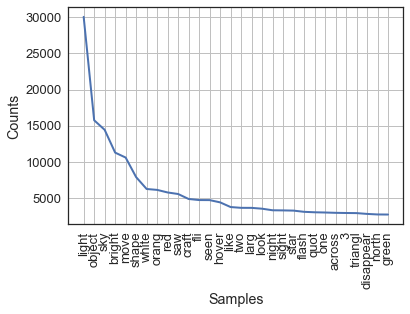

In [283]:
fd.plot(30)

In [307]:
import sklearn.feature_extraction.text as skft

# Run LDA on the tales dataset.
n_features = 1000
n_topics = 5
n_top_words = 20

# "we're going to use the same code as above with a few changes. We want to limit the frequency... 
# so let's keep around only words that appear in more than two document but in less than 70%
# let's also restrict ourselves to 1000 words and remove stopwords
tf_vectorizer = skft.CountVectorizer(max_df=0.7, min_df=2, max_features=n_features, stop_words='english')
tf_ufo = tf_vectorizer.fit_transform(word_list)

In [308]:
lda = skd.LatentDirichletAllocation(n_topics=n_topics, 
                                    max_iter=10,
                                    learning_method='online', 
                                    learning_offset=50.,
                                    random_state=0)

In [309]:
lda.fit(tf_ufo);

In [310]:
# a helper function to print the topics and the top words in each
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

print("Topics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Topics in LDA model:
Topic #0:
shape craft larg night flash green ball firebal sphere silent slow head oval report went possibl horizon ca quick close
Topic #1:
light object bright orang fli quot east observ circl spot 30 yellow area line cigar outsid straight feet jet came
Topic #2:
sky star triangl travel color pd triangular low chang direct minut wit black turn cloud aircraft blink hous home vanish
Topic #3:
white saw seen hover like look sight north fast glow orb round second small circular clear stationari notic float altitud
Topic #4:
red disappear appear speed south west high blue format slowli note sound strang near 10 time away silver drive follow



### The clustering is not super clear, and more data would be needed to perform better clustering 

### Can we build a classifier based on summaries to guess shape?

In [355]:
ufo_train, ufo_test = skcv.train_test_split(ufo_og, test_size=0.3, random_state=0)

# let's "vectorize" the content
vectorizer = skft.CountVectorizer(max_df=0.7)
X_train = vectorizer.fit_transform(ufo_train.summary)

In [358]:
pipeline = skpipe.Pipeline(
    [('vect', skft.CountVectorizer(max_df=0.7)),
     ('tfidf', skft.TfidfTransformer()),
     ('clf', sknb.MultinomialNB())])

pipeline.fit(ufo_train.summary, ufo_train['shape']);

In [359]:
import sklearn.metrics as skmetrics

test_predicted = pipeline.predict(ufo_test.summary)
print ('Accuracy:', skmetrics.accuracy_score(ufo_test['shape'], test_predicted))
print (skmetrics.classification_report(ufo_test['shape'], test_predicted))

Accuracy: 0.288681152097
             precision    recall  f1-score   support

    changed       0.00      0.00      0.00         1
   changing       0.00      0.00      0.00       475
    chevron       0.00      0.00      0.00       256
      cigar       1.00      0.05      0.09       505
     circle       0.41      0.03      0.06      1924
       cone       0.00      0.00      0.00        80
      cross       0.00      0.00      0.00        59
   cylinder       0.67      0.01      0.01       331
      delta       0.00      0.00      0.00         1
    diamond       1.00      0.00      0.01       306
       disk       0.77      0.18      0.29      1266
        egg       0.00      0.00      0.00       189
   fireball       0.80      0.19      0.31      1605
      flare       0.00      0.00      0.00         1
      flash       0.00      0.00      0.00       376
  formation       0.00      0.00      0.00       645
      light       0.24      0.99      0.38      4149
      other       0.

### Nope, no good. Too many shapes with not enough data, I think. Maybe we can if we only look at data with the most common shapes.

In [363]:
ufo_common = ufo_og.copy()
ufo_common = ufo_common[(ufo_common['shape'] == 'light') | (ufo_common['shape'] == 'disk')
                       | (ufo_common['shape'] == 'triangle')]
ufo_common.groupby('shape').count()

,date,city,state,country,duration in seconds,time,summary,lat,long
shape,,,,,,,,,
disk,4275,4275,4275,4275,4275,4275,4275,4275,4275
light,14011,14011,14011,14011,14011,14011,14011,14011,14011
triangle,6742,6742,6742,6742,6742,6742,6742,6742,6742


In [364]:
ufo_ctrain, ufo_ctest = skcv.train_test_split(ufo_common, test_size=0.3, random_state=0)

pipeline = skpipe.Pipeline(
    [('vect', skft.CountVectorizer(max_df=0.7)),
     ('tfidf', skft.TfidfTransformer()),
     ('clf', sknb.MultinomialNB())])

pipeline.fit(ufo_ctrain.summary, ufo_ctrain['shape']);

import sklearn.metrics as skmetrics

test_predicted = pipeline.predict(ufo_ctest.summary)
print ('Accuracy:', skmetrics.accuracy_score(ufo_ctest['shape'], test_predicted))
print (skmetrics.classification_report(ufo_ctest['shape'], test_predicted))

Accuracy: 0.720868291384
             precision    recall  f1-score   support

       disk       0.93      0.25      0.39      1263
      light       0.68      0.99      0.81      4209
   triangle       0.88      0.47      0.61      2037

avg / total       0.78      0.72      0.68      7509



### Better but still not particularly accurate. Summaries don't seem like a good enough indicator of shape, especially because there are so many shape options but only a few have a lot of reports

In [362]:
import re
lexicon = {}
value_map = {'positive': 1, 'neutral': 0, 'negative': -1}
with open('subjectivity_clues_hltemnlp05/subjclueslen1-HLTEMNLP05.tff') as reader:
    for line in reader:
        m = re.match(".*\sword1=(\w+)\s.*priorpolarity=(positive|neutral|negative)", line)
        if m:
            m = m.groups()
            assert len(m) == 2
            lexicon[m[0]] = value_map[m[1]]

In [317]:
def get_sentiment(lexicon, s):
    tokens = s.lower().split()
    tokens = map(stemmer.stem, tokens)
    scores = [lexicon[t] for t in tokens if t in lexicon]
    return 'pos' if sum(scores) > 0 else 'neut' if sum(scores) == 0 else 'neg'

In [318]:
predicted_labels = [get_sentiment(lexicon, x) for x in ufo_og.summary]

In [476]:
pos_ufo = predicted_labels.count('pos')/len(predicted_labels)
neg_ufo = predicted_labels.count('neg')/len(predicted_labels)
neut_ufo = predicted_labels.count('neut')/len(predicted_labels)

print('Percent of positive reviews: ', pos_ufo*100)
print('Percent of neutral reviews: ', neut_ufo*100)
print('Percent of negative reviews: ', neg_ufo*100)

ufo_sent = ufo_og.copy()
ufo_sent['sentiment'] = predicted_labels

ufo_sent[['summary','sentiment']].sample(10)

Percent of positive reviews:  45.49451215814687
Percent of neutral reviews:  33.29543387302164
Percent of negative reviews:  21.21005396883148


,summary,sentiment
date,,
2013-04-25 02:00:00,~7 Orange lights in a triangular formation mov...,pos
2008-08-23 22:00:00,Strange pulsing fireball low on the horizon.,neg
1998-02-23 20:33:00,my wife and i were walking across a parking lo...,neg
2013-10-12 22:00:00,"Oct 12, 2013, I saw 3 orbs in sky east of gr...",neut
2006-06-22 00:10:00,One bright object moving awkwardly interacting...,neg
1999-07-04 23:00:00,Saw an object (about the size of star) traveli...,neut
2012-11-02 22:00:00,"Glowing silverish sphere type object, with bri...",pos
2008-04-16 22:27:00,4 or 5 yellow lights in the sky followed a lou...,pos
2001-07-10 21:45:00,large triangle gray to black in color. large c...,pos


In [367]:
summm = ufo_sent.ix[5000].summary
print(get_sentiment(lexicon,summm))
print(summm)

pos
Orange Glowing Ball Over Springfield Oregon Moving NW to SE Across The City


### 45.5% of UFO summaries according to this classifier are positive, 33.3% neutral, and 21.2% negative

In [458]:
statepops = [4779736,710231,6392017,2915918,37253956,5029196,3574097,658893,897934,18801310,9687653,1360301,1567582,12830632,6483802,
             3046355,2853118,4339367,4533372,1328361,5773552,6547629,9883640,5303925,2967297,5988927,989415,1826341,2700551,
             1316470,8791894,2059179,19378102,9535483,672591,11536504,3751351,3831074,12702379,3548000,1052567,4625364,814180,6346105,
             25145561,2763885,625741,8001024,6724540,1852994,5686986,563626]

states_ufo = ufo_us.groupby('state').count()
states_ufo = states_ufo.drop(['date','city','country','shape','duration in seconds','summary','lat','long'],axis=1)
states_ufo['state population'] = statepops
states_ufo['time'] = states_ufo['time'].astype(float)

In [459]:
states_ufo['ratio of count and state population'] = (states_ufo['time'] / states_ufo['state population']) * 100

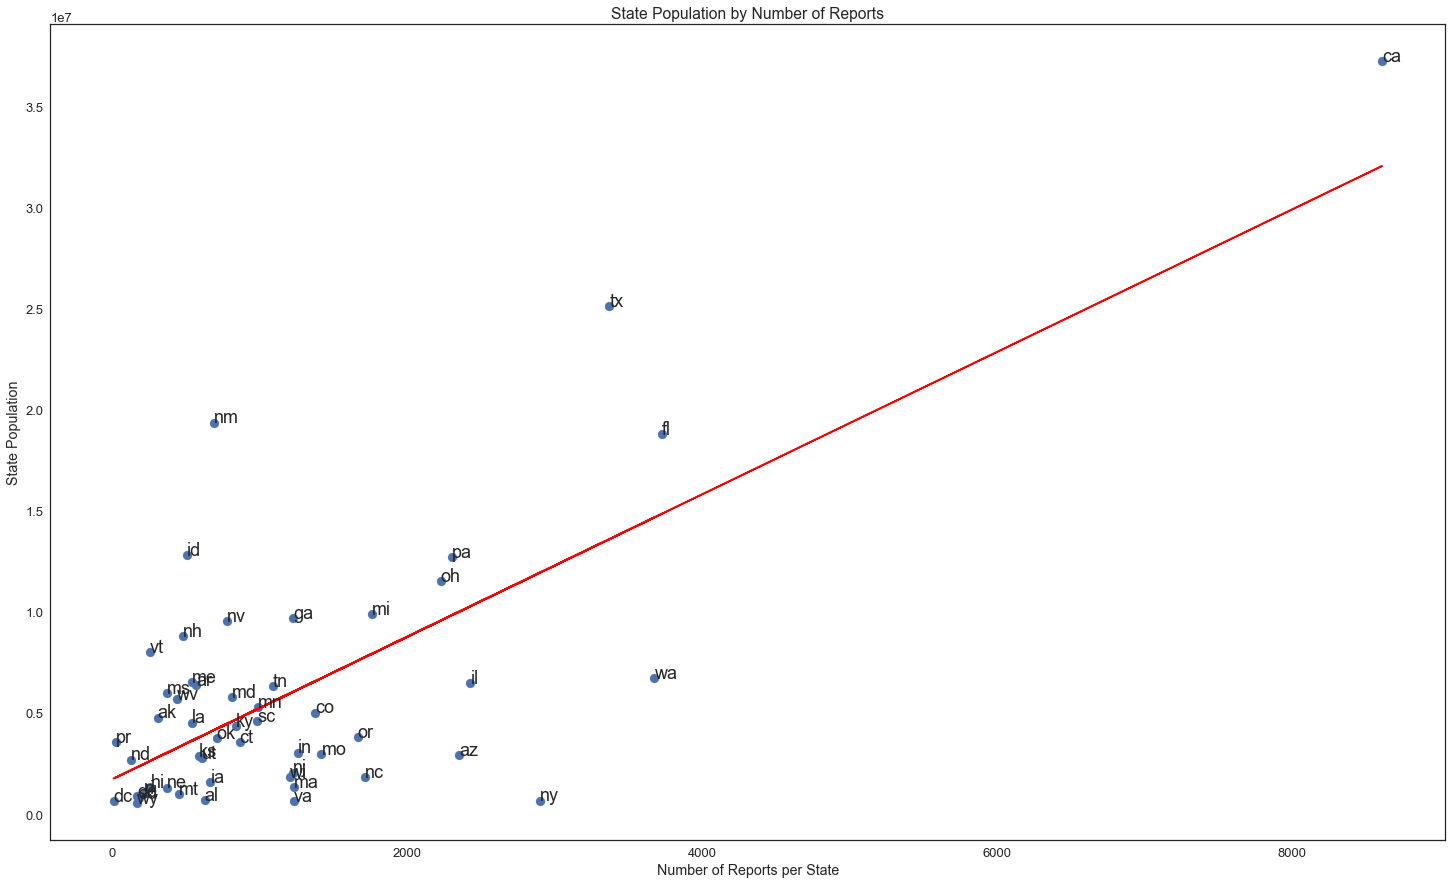

In [466]:
states_ufo.sort_values('ratio of count and state population', ascending=False)
plt.figure(figsize=(25,15))
plt.xlabel('Number of Reports per State')
plt.ylabel('State Population')
plt.title('State Population by Number of Reports')

states_ufo = states_ufo.rename(columns={'time':'number of reports'})

x = states_ufo['number of reports']
y = states_ufo['state population']
plt.scatter(x=states_ufo['number of reports'],y=states_ufo['state population'],s=80)

plt.rcParams.update({'font.size':18})

for i, txt in enumerate(states_ufo.index):
    plt.annotate(txt, (states_ufo['number of reports'][i],states_ufo['state population'][i]))

fit = np.polyfit(x, y, deg=1)
plt.plot(x, fit[0] * x + fit[1], color='red')

,number of reports,state population
number of reports,1.000000,0.725856
state population,0.725856,1.000000


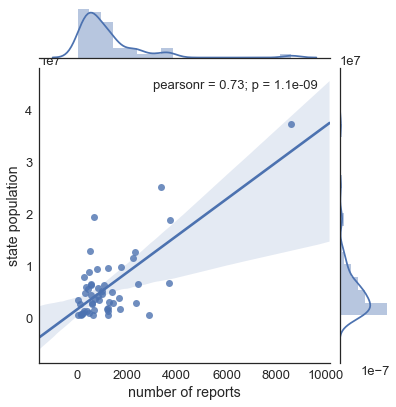

In [479]:
from scipy import stats

gp = sns.JointGrid(x=x,y=y)
gp = gp.plot(sns.regplot, sns.distplot)
gp = gp.annotate(stats.pearsonr)

states_ufo.corr('pearson').drop('ratio of count and state population',axis=1).drop('ratio of count and state population', axis=0)

### How populous a state is is not necessarily indicative of the number of UFO reports given but a trend exists.

In [470]:
ufo_og.sort_index()

,date,city,state,country,shape,duration in seconds,time,summary,lat,long
date,,,,,,,,,,
1906-11-11 00:00:00,1906-11-11 00:00:00,las vegas,nv,us,oval,30.0,30 seconds,Two silent blue lights followed by a hellicopter.,36.175,-115.136389
1920-06-11 21:00:00,1920-06-11 21:00:00,toledo,oh,us,light,2700.0,45 minutes,Star like objects,41.6638889,-83.555278
1925-12-28 18:00:00,1925-12-28 18:00:00,corona,sd,us,light,5.0,5 seconds,"3 triangular light forms. White, blue, green. ...",45.3338889,-96.762778
1929-07-05 14:00:00,1929-07-05 14:00:00,new york city,ny,us,disk,60.0,1 minute,http://www.youtube.com/watch?feature=player_em...,40.7141667,-74.006389
1930-06-01 22:00:00,1930-06-01 22:00:00,wills point,tx,us,cigar,120.0,2 minutes,Cigar shaped object moving from West to East,32.7091667,-96.008056
1931-02-15 14:00:00,1931-02-15 14:00:00,lebanon,pa,us,fireball,300.0,~5 minutes,"Bright fireball sighted and followed, then min...",40.3408333,-76.411667
1933-04-18 19:00:00,1933-04-18 19:00:00,vestal,ny,us,light,900.0,15 minutes,Three lights forming tight triangle hovered in...,42.085,-76.054167
1934-09-15 15:30:00,1934-09-15 15:30:00,cleveland,oh,us,unknown,2400.0,30-40 minutes,I saw a bright light that looked like a star t...,41.4994,-81.695556
1936-09-15 19:00:00,1936-09-15 19:00:00,valley city (6.5 miles east of),nd,us,disk,5.0,5 seconds,"Two brothers observe, hear, three black discs ...",46.9233,-98.002778


In [471]:
ufo_days.sort_index()

,date,city,state,country,shape,duration in seconds,lat,long,day of the year
date,,,,,,,,,
1906-11-11 00:00:00,1906-11-11 00:00:00,las vegas,nv,us,oval,30.0,36.175,-115.136389,315
1920-06-11 21:00:00,1920-06-11 21:00:00,toledo,oh,us,light,2700.0,41.6638889,-83.555278,163
1925-12-28 18:00:00,1925-12-28 18:00:00,corona,sd,us,light,5.0,45.3338889,-96.762778,362
1929-07-05 14:00:00,1929-07-05 14:00:00,new york city,ny,us,disk,60.0,40.7141667,-74.006389,186
1930-06-01 22:00:00,1930-06-01 22:00:00,wills point,tx,us,cigar,120.0,32.7091667,-96.008056,152
1931-02-15 14:00:00,1931-02-15 14:00:00,lebanon,pa,us,fireball,300.0,40.3408333,-76.411667,046
1933-04-18 19:00:00,1933-04-18 19:00:00,vestal,ny,us,light,900.0,42.085,-76.054167,108
1934-09-15 15:30:00,1934-09-15 15:30:00,cleveland,oh,us,unknown,2400.0,41.4994,-81.695556,258
1936-09-15 19:00:00,1936-09-15 19:00:00,valley city (6.5 miles east of),nd,us,disk,5.0,46.9233,-98.002778,259
